In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!ls -a

.  ..  .config	drive  sample_data


In [3]:
!pip install transformers

     |████████████████████████████████| 1.9MB 5.4MB/s 
     |████████████████████████████████| 890kB 32.8MB/s 
     |████████████████████████████████| 3.2MB 39.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=832dd34e4375120abf655871356d5621b263d344f535a6dc5d4b22c8f223c5d2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [4]:
import sys
import numpy as np
import pandas as pd
import random as rn
import torch
from torch import nn
from transformers import *
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output

In [5]:
rn.seed(321)
np.random.seed(321)
torch.manual_seed(321)
torch.cuda.manual_seed(321)

In [6]:
from transformers import *

class GlobalBERT:
    def __init__(self):
        self.model_class, self.tokenizer_class, self.pretrained_weights = (BertModel, BertTokenizer, 'bert-large-cased')

        self.tokenizer = self.tokenizer_class.from_pretrained(self.pretrained_weights)
        self.model = self.model_class.from_pretrained(self.pretrained_weights, output_hidden_states=True)

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        raise Exception

class BERT11Sense(GlobalBERT):
    def __init__(self):
        super().__init__()

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        input_ids = torch.tensor([self.tokenizer.encode(text,
                                                   add_special_tokens=use_special_tokens)])
        outputs = self.model(input_ids)[2]
        return (outputs[12][0]).detach()
       
       
bb = BERT11Sense()


bb.from_sentence_to_embedding("hello darling")

tensor([[ 0.5389,  1.0641,  0.0685,  ...,  0.4949, -0.4563,  0.9197],
        [ 0.1927, -1.5048, -0.0400,  ...,  0.2208, -0.8770,  0.8758],
        [-0.8659, -1.0225, -0.8534,  ...,  0.3458, -0.1421,  0.3717],
        [ 0.0980, -0.0028,  0.0464,  ...,  0.3661, -0.0593, -0.0460]])

# Manuel Luna Park

In [ ]:
ids = bb.tokenizer.encode("harmonize one's goals with one's abilities .")

In [ ]:
bb.tokenizer.convert_ids_to_tokens(np.array(ids))

['[CLS]',
 'harm',
 '##oni',
 '##ze',
 'one',
 "'",
 's',
 'goals',
 'with',
 'one',
 "'",
 's',
 'abilities',
 '.',
 '[SEP]']

In [ ]:
emb = bb.from_sentence_to_embedding('im unstoppable')
emb[0].shape

(1024,)

In [ ]:
if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(tag_values[label_idx])
        new_tokens.append(token)

IndentationError: ignored

In [ ]:
sentence = 'im unstoppable invincible'

ids = bb.tokenizer.encode(sentence)
emb = bb.from_sentence_to_embedding(sentence)

tokens = bb.tokenizer.convert_ids_to_tokens(np.array(ids))
new_tokens = []
new_embs = []

i = 1
leng = len(tokens)


while i < leng - 1:
  subword = tokens[i]
  next_subword = tokens[i+1]

  if not subword.startswith('##') and not next_subword.startswith('##'):
    # questa subword è una parola intera
    new_embs.append(emb[i])
  elif not subword.startswith('##') and next_subword.startswith('##'):
    # questa subword è l'inizio di una parola (la prima subword)
    to_average = [emb[i]]
  elif subword.startswith('##') and next_subword.startswith('##'):
    # questa è una subword intermedia
    to_average.append(emb[i])
  elif subword.startswith('##') and not next_subword.startswith('##'):
    # questa è l'ultima subword
    to_average.append(emb[i])
    all_subwords_embs = torch.stack(to_average, dim = 0)
    word_emb = torch.mean(all_subwords_embs, dim = 0)
    new_embs.append(word_emb)
  i += 1

# for token, e in zip(tokens, emb):
#     if token == '[CLS]' or token == '[SEP]':
#       pass
#     elif token.startswith("##"):
#         new_tokens[-1] = new_tokens[-1] + token[2:]
#         embs_to_average.append(e)
#     else:
        
#         new_tokens.append(token)


In [7]:
def embeddings_from_bert(sentence):
  ids = bb.tokenizer.encode(sentence)
  emb = bb.from_sentence_to_embedding(sentence)

  tokens = bb.tokenizer.convert_ids_to_tokens(np.array(ids))
  new_tokens = []
  new_embs = []

  i = 1
  leng = len(tokens)


  while i < leng - 1:
    subword = tokens[i]
    next_subword = tokens[i+1]

    if not subword.startswith('##') and not next_subword.startswith('##'):
      # questa subword è una parola intera
      new_embs.append(emb[i])
    elif not subword.startswith('##') and next_subword.startswith('##'):
      # questa subword è l'inizio di una parola (la prima subword)
      to_average = [emb[i]]
    elif subword.startswith('##') and next_subword.startswith('##'):
      # questa è una subword intermedia
      to_average.append(emb[i])
    elif subword.startswith('##') and not next_subword.startswith('##'):
      # questa è l'ultima subword
      to_average.append(emb[i])
      all_subwords_embs = torch.stack(to_average, dim = 0)
      word_emb = torch.mean(all_subwords_embs, dim = 0)
      new_embs.append(word_emb)
    i += 1

  return new_embs

In [ ]:
new_embs[2].shape

torch.Size([1024])

In [ ]:
emb

tensor([[ 0.0172,  0.6552,  0.1322,  ..., -0.1035, -0.0808,  0.5268],
        [-0.0224, -1.4588, -0.8163,  ...,  0.0316,  0.9307,  0.1629],
        [-0.8460, -0.5171,  0.5368,  ..., -0.5442, -0.3154, -0.4649],
        ...,
        [-0.7751,  0.0093, -0.2494,  ...,  0.0839,  0.9945,  0.0928],
        [-0.9027,  0.3534, -0.3756,  ...,  0.4484, -0.1198,  0.1056],
        [ 0.0059,  0.0030, -0.0348,  ...,  0.0856,  0.0140,  0.0279]])

# End of Luna Park

In [8]:
!ls -a

.  ..  .config	drive  sample_data


In [9]:
%cd drive/My Drive/Colab Notebooks/experiments/data

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/experiments/data'
/content


In [ ]:
df_spazi = pd.read_csv('moh-x1.csv')

In [ ]:
df_no_spazi = pd.read_csv('moh-x.csv')

In [ ]:
df.head(3)

,arg1,arg2,verb,sentence,verb_idx,label
0,knowledge,NaN,absorb,He absorbed the knowledge or beliefs of his t...,1,1
1,cost,NaN,absorb,He absorbed the costs for the accident .,1,1
2,tax,NaN,absorb,The sales tax is absorbed into the state inco...,4,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [ ]:
import sklearn

In [ ]:
train, test = sklearn.model_selection.train_test_split(df, train_size=6, test_size=4)

In [ ]:
train.head(3)

,arg1,arg2,verb,sentence,verb_idx,label
100,industry,NaN,computerize,They computerized the car industry .,1,0
493,seed,NaN,sow,She sowed sunflower seeds .,1,0
376,crisis,NaN,precipitate,The crisis precipitated by Russia 's revoluti...,2,1


In [ ]:
test.head(3)

,arg1,arg2,verb,sentence,verb_idx,label
155,child,NaN,drown,The child drowned in the lake .,2,0
308,jewel,NaN,lock,She locked her jewels in the safe .,1,0
511,infection,NaN,spread,the infection spread .,2,0


In [ ]:
bb.tokenizer.tokenize('Hi my name is Dima')

['Hi', 'my', 'name', 'is', 'Di', '##ma']

In [ ]:
(bb.from_sentence_to_embedding('He absorbed the knowledge or beliefs of his tribe'))[0][0:11]

array([-0.3964905 ,  0.6026025 ,  0.6314686 , -0.7780536 ,  0.11271936,
       -0.30086   , -1.1320194 ,  0.08013009, -0.07451884, -0.5060913 ,
       -0.3941079 ], dtype=float32)

In [ ]:
X = np.mean(bb.from_sentence_to_embedding('He absorbed the knowledge or beliefs of his tribe'), axis = 0)[0:11]

In [ ]:
embeddings = [np.mean(bb.from_sentence_to_embedding(k), axis = 0) for k in df["sentence"].values]

In [ ]:
embeddings = [embeddings_from_bert(k) for k in df_no_spazi["sentence"].values]

In [ ]:
embeddings = [np.array([e.numpy() for e in k]) for k in embeddings]

In [ ]:
embeddings = np.array(embeddings)
embeddings.shape

(647, 1024)

In [ ]:
type(embeddings[0])

numpy.ndarray

In [ ]:
df.sentence[0]

' He absorbed the knowledge or beliefs of his tribe .'

In [ ]:
df.sentence[1]

' He absorbed the costs for the accident .'

In [ ]:
embeddings[0]

[tensor([ 0.3627, -0.1573, -0.5424,  ...,  0.1758,  0.2949,  0.3320]),
 tensor([-0.0018,  0.3736, -0.6049,  ..., -0.5269,  0.0751, -0.2817]),
 tensor([ 0.0078, -0.1930,  0.0467,  ...,  0.0765,  0.1487,  0.0944]),
 tensor([ 0.6986, -0.2134, -0.1672,  ..., -0.5388,  0.3639,  0.4016]),
 tensor([-0.1983,  0.0403,  0.2211,  ..., -0.8600, -0.5409, -0.2065]),
 tensor([-0.2045,  0.1089,  0.2682,  ..., -0.6577,  1.1393,  0.3223]),
 tensor([-0.4827,  0.2222, -0.4849,  ..., -0.3595,  0.0723, -0.3961]),
 tensor([-0.1009, -0.0250, -0.8648,  ...,  0.0488, -0.2410, -0.3992]),
 tensor([-0.1732, -0.3680,  0.6450,  ...,  0.2753, -0.1431,  0.0009]),
 tensor([ 0.0209, -0.4414,  0.3024,  ...,  0.0693,  0.0079, -0.0744])]

In [ ]:
len(embeddings[1])

8

In [ ]:
embeddings

array([[-0.03745294, -0.01263042, -0.04028056, ..., -0.19772637,
         0.1021984 , -0.06522829],
       [-0.14367059,  0.18633032,  0.15493456, ..., -0.13952447,
         0.03996621, -0.11060034],
       [ 0.06612998, -0.02974826, -0.10468091, ...,  0.05463066,
        -0.10037982, -0.05562477],
       ...,
       [-0.16652139, -0.02595166, -0.01150189, ..., -0.14495191,
         0.06566498, -0.02446336],
       [-0.10311577,  0.18686408, -0.27528736, ..., -0.2897042 ,
        -0.02582477, -0.00153623],
       [ 0.07959738,  0.18550819, -0.24588506, ..., -0.069438  ,
         0.06056062, -0.2488126 ]], dtype=float32)

In [ ]:
embeddings1 = {k.strip():v for k, v in zip(df_spazi["sentence"].values, embeddings)}

In [ ]:
import pickle
with open('bert_mohx.pickle', 'wb') as handle:
    pickle.dump(embeddings1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
embeddings2 = {k:v for k, v in zip(df["sentence"].values, embeddings)}

In [ ]:
import pickle
with open('bert_mohx2.pickle', 'wb') as handle:
    pickle.dump(embeddings2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
torch.save(embeddings, "bert_mohx.pth")

In [ ]:
torch.save(embeddings1, "bert_mohx_dict.pth")

In [ ]:
!pip install hf

In [ ]:
import h5py
bert = h5py.File('bert_mohx.hdf5', 'w')

In [ ]:
bert.create_dataset('bert_mohx', data=embeddings)

<HDF5 dataset "bert_mohx": shape (647, 1024), type "<f4">

In [ ]:
bert.close()

In [ ]:
#np.save('mohx_bert.npy', embeddings)

In [ ]:
#bert_mohx = np.load(open('mohx_bert.npy', 'rb'))

In [ ]:
#!ls -a

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr = LogisticRegression()
predictions = cross_val_predict(lr, embeddings, df["label"].values, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df["label"].values, predictions, target_names=class_names))

              precision    recall  f1-score   support

     Literal       0.78      0.81      0.79       332
Metaphorical       0.79      0.76      0.77       315

    accuracy                           0.78       647
   macro avg       0.78      0.78      0.78       647
weighted avg       0.78      0.78      0.78       647



In [ ]:
class_names = ["Literal", "Metaphorical"]

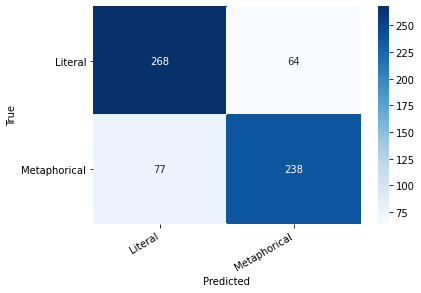

In [ ]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

y_val = df["label"].values
y_pred = predictions

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');

cm = confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)